In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('adult_cleaned_final.csv')

In [85]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [86]:
data = pd.concat([data.drop('occupation', axis=1), pd.get_dummies(data.occupation, dtype=int).add_prefix('occupation_')], axis=1)
data = pd.concat([data.drop('workclass', axis=1), pd.get_dummies(data.workclass, dtype=int).add_prefix('workclass_')], axis=1)
data = data.drop('education', axis=1)
data = pd.concat([data.drop('marital-status', axis=1), pd.get_dummies(data['marital-status'], dtype=int).add_prefix('marital-status_')], axis=1)
data = pd.concat([data.drop('relationship', axis=1), pd.get_dummies(data.relationship, dtype=int).add_prefix('relationship_')], axis=1)
data = pd.concat([data.drop('race', axis=1), pd.get_dummies(data.race, dtype=int).add_prefix('race_')], axis=1)
data = pd.concat([data.drop('native-country', axis=1), pd.get_dummies(data['native-country'], dtype=int).add_prefix('native-country_')], axis=1)

In [87]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['income'] = data['income'].str.strip()
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0 if x == '<=50K' else None)

In [88]:
data = data.dropna(subset=['income'])

In [89]:
data = data.drop('fnlwgt', axis=1)

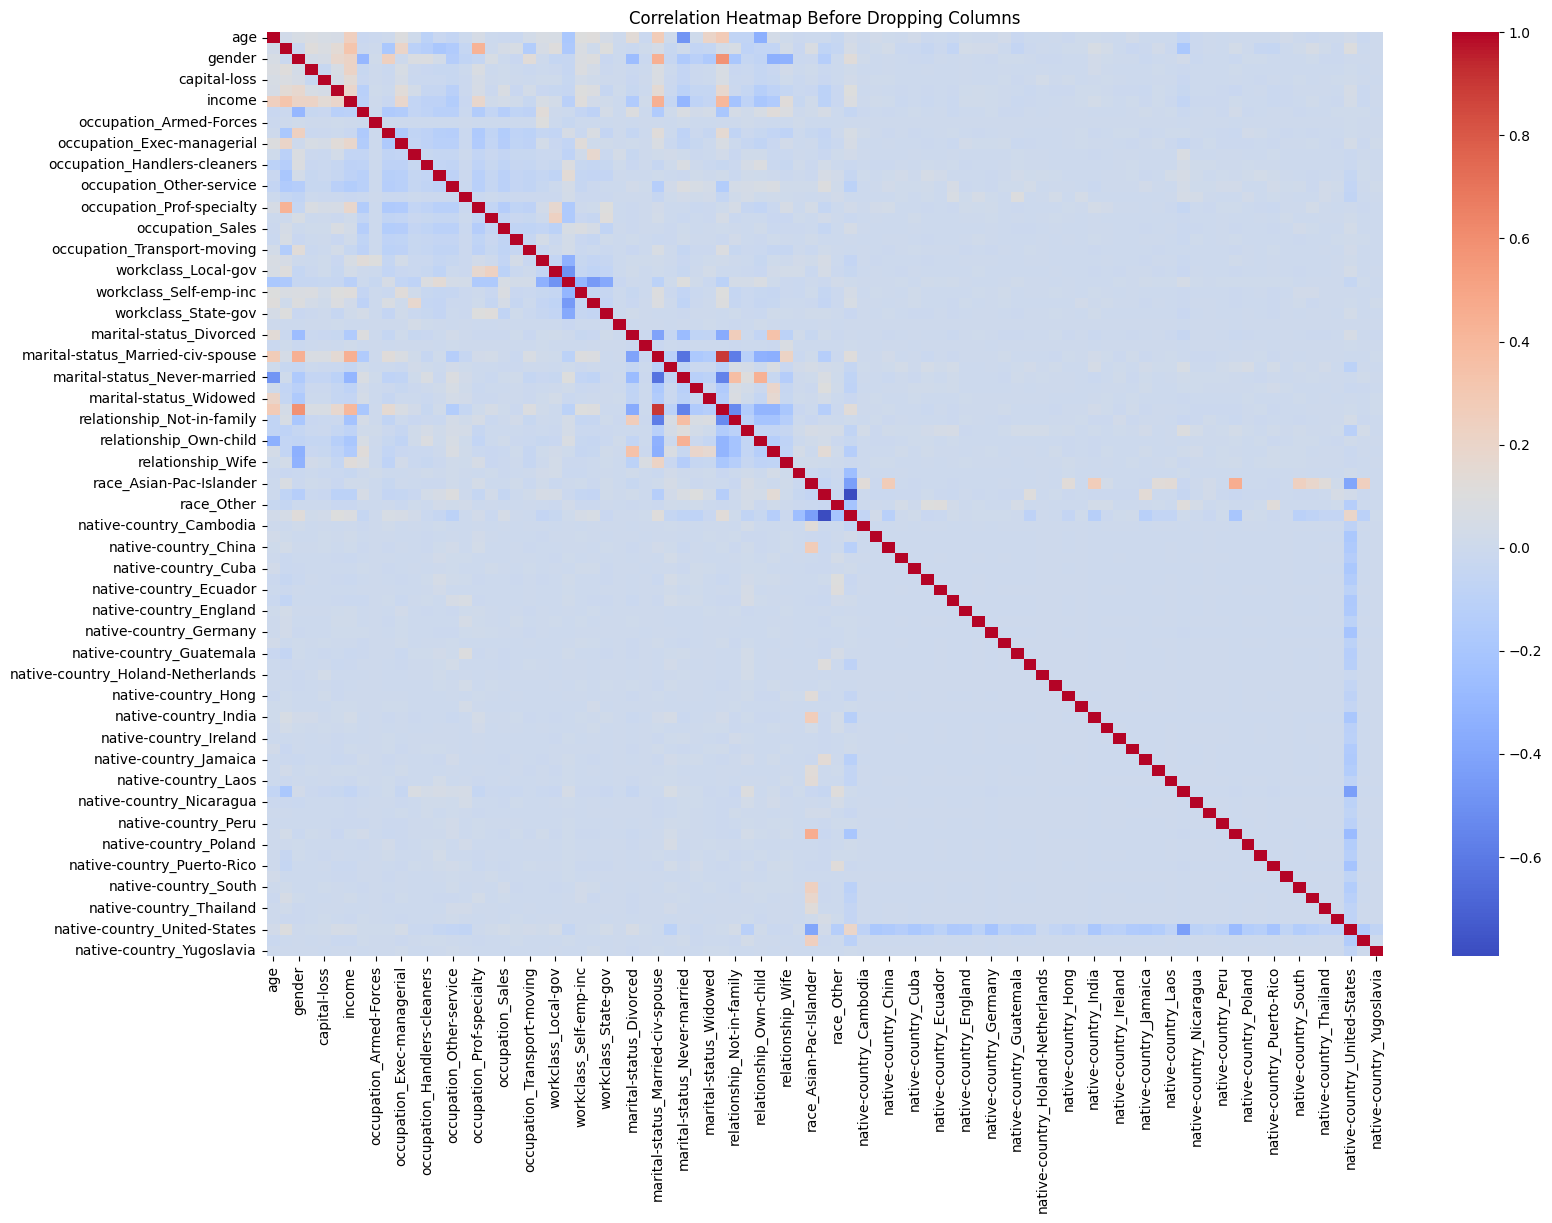

In [90]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Before Dropping Columns')
plt.show()

In [91]:
correlations = data.corr()['income'].abs()
threshold = 0.1
cols_drop = correlations[correlations < threshold].index

In [92]:
data_dropped = data.drop(cols_drop, axis=1)

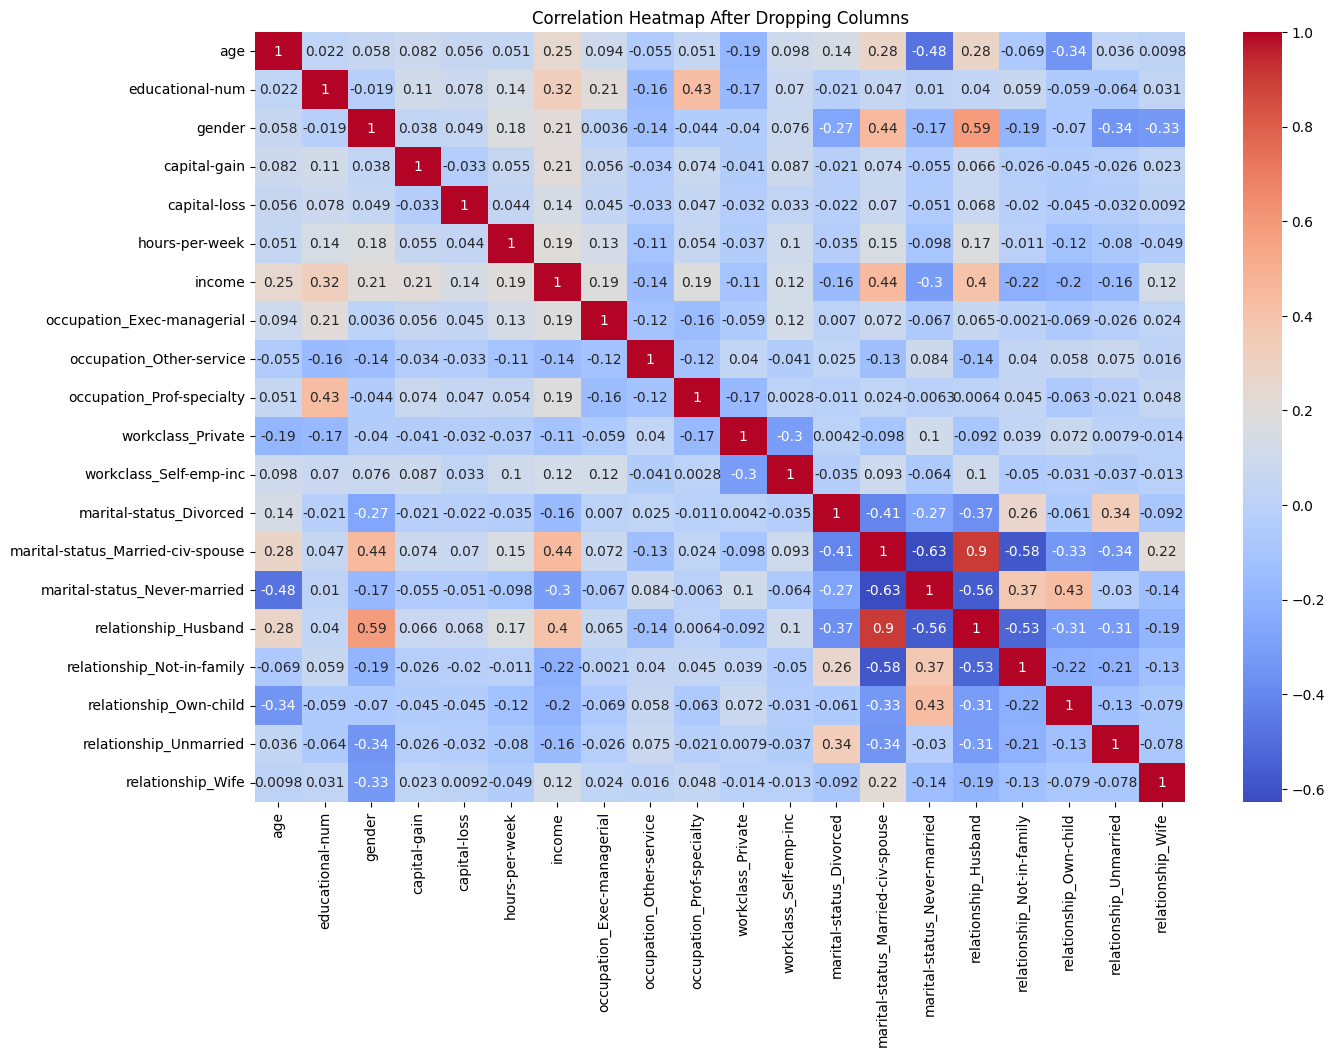

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(data_dropped.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap After Dropping Columns')
plt.show()

In [94]:
data_dropped.to_csv('adult_cleaned_final_2.csv', index=False)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [96]:
train_data, test_data = train_test_split(data_dropped, test_size=0.2, random_state=42)

In [97]:
train_data

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Private,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
12708,55,14,1,0,1977,50,1,1,0,0,1,0,0,1,0,1,0,0,0,0
17090,22,3,0,0,0,40,0,0,0,0,1,0,0,0,1,0,0,0,0,0
12292,23,12,1,0,0,40,0,0,0,0,1,0,0,0,1,0,0,0,0,0
12587,49,12,0,0,1902,40,1,0,0,0,1,0,0,1,0,0,0,0,0,1
12088,56,10,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,22,10,1,0,0,40,0,0,0,0,1,0,0,1,0,1,0,0,0,0
5390,56,9,1,0,0,45,0,0,0,0,0,0,0,1,0,1,0,0,0,0
860,54,9,0,0,0,40,0,0,0,0,1,0,0,0,1,0,1,0,0,0
15795,30,9,0,0,0,40,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [98]:
test_data

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Private,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
22232,31,11,1,0,0,50,0,0,0,0,1,0,0,1,0,1,0,0,0,0
12483,47,11,1,0,0,50,0,0,0,0,1,0,1,0,0,0,1,0,0,0
14458,39,10,0,0,0,40,0,0,0,0,1,0,1,0,0,0,0,0,1,0
11603,59,9,0,0,0,40,0,1,0,0,1,0,1,0,0,0,1,0,0,0
27638,45,13,1,7298,0,40,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449,23,9,1,0,0,38,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6746,60,10,1,0,0,50,1,0,0,0,0,0,0,1,0,1,0,0,0,0
22334,67,9,1,0,0,38,1,1,0,0,1,0,0,0,0,0,0,0,1,0
25040,40,9,1,0,0,40,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [99]:
train_X = train_data.drop('income', axis=1)
train_y = train_data['income']
test_X = test_data.drop('income', axis=1)
test_y = test_data['income']

In [100]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [101]:
train_score = rf.score(train_X, train_y)
test_score = rf.score(test_X, test_y)
print(f'Training Accuracy: {train_score:.4f}')
print(f'Test Accuracy: {test_score:.4f}')

Training Accuracy: 0.9319
Test Accuracy: 0.8336


In [102]:
importances = dict(zip(rf.feature_names_in_, rf.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances:")
for feature, importance in importances.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
age: 0.2589
educational-num: 0.1544
capital-gain: 0.1365
marital-status_Married-civ-spouse: 0.0947
hours-per-week: 0.0758
relationship_Husband: 0.0732
capital-loss: 0.0448
occupation_Prof-specialty: 0.0253
occupation_Exec-managerial: 0.0235
marital-status_Never-married: 0.0212
workclass_Private: 0.0174
gender: 0.0142
relationship_Wife: 0.0136
relationship_Not-in-family: 0.0126
occupation_Other-service: 0.0097
workclass_Self-emp-inc: 0.0070
marital-status_Divorced: 0.0067
relationship_Unmarried: 0.0058
relationship_Own-child: 0.0046


In [103]:
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

In [104]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [105]:
best_rf = grid_search.best_estimator_
print(f'Best Estimator: {best_rf}')

Best Estimator: RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)


In [106]:
best_train_score = best_rf.score(train_X, train_y)
best_test_score = best_rf.score(test_X, test_y)
print(f'Training Accuracy after tuning: {best_train_score:.4f}')
print(f'Test Accuracy after tuning: {best_test_score:.4f}')

Training Accuracy after tuning: 0.8583
Test Accuracy after tuning: 0.8502


In [107]:
best_importances = dict(zip(best_rf.feature_names_in_, best_rf.feature_importances_))
best_importances = {k: v for k, v in sorted(best_importances.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances after tuning:")
for feature, importance in best_importances.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances after tuning:
marital-status_Married-civ-spouse: 0.1946
capital-gain: 0.1872
educational-num: 0.1719
relationship_Husband: 0.1246
age: 0.0861
capital-loss: 0.0482
occupation_Prof-specialty: 0.0290
occupation_Exec-managerial: 0.0257
hours-per-week: 0.0253
marital-status_Never-married: 0.0223
gender: 0.0203
relationship_Wife: 0.0193
relationship_Not-in-family: 0.0148
occupation_Other-service: 0.0087
workclass_Self-emp-inc: 0.0054
relationship_Own-child: 0.0050
workclass_Private: 0.0046
relationship_Unmarried: 0.0039
marital-status_Divorced: 0.0033


In [108]:
max_depth = 10
n_estimators = 250
iterations = 1000

In [109]:
new_param_grid = {
    'n_estimators': [248,249,250,251,252],
    'max_depth': [8,9,10,11,12]
}

In [110]:
import numpy as np

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=new_param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
print("Najbolji parametri iz Grid Search:", best_params)

Najbolji parametri iz Grid Search: {'max_depth': 10, 'n_estimators': 249}


In [111]:
n_estimators_bounds = [best_params['n_estimators'] - 5, best_params['n_estimators'] + 5]
max_depth_bounds = [best_params['max_depth'] - 2, best_params['max_depth'] + 2]
print(n_estimators_bounds)
print(max_depth_bounds)

[244, 254]
[8, 12]


In [112]:
def objective_function(n_estimators, max_depth):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    
    clf.fit(train_X, train_y)
    return -clf.score(test_X, test_y)

In [113]:
n_particles = 10
n_iterations = 10
c1 = 0.5 
c2 = 0.3 
w = 0.9   

particles = np.zeros((n_particles, 2))
velocities = np.zeros((n_particles, 2))
pbest_positions = np.zeros((n_particles, 2))
pbest_scores = np.full(n_particles, np.inf)
gbest_position = np.zeros(2)
gbest_score = np.inf

np.random.seed(42)
particles[:, 0] = np.random.uniform(n_estimators_bounds[0], n_estimators_bounds[1], n_particles)
particles[:, 1] = np.random.uniform(max_depth_bounds[0], max_depth_bounds[1], n_particles)
velocities[:, 0] = np.random.uniform(-1, 1, n_particles)
velocities[:, 1] = np.random.uniform(-1, 1, n_particles)

In [114]:
for iteration in range(n_iterations):
    for i in range(n_particles):
        fitness = objective_function(particles[i, 0], particles[i, 1])
        
        if fitness < pbest_scores[i]:
            pbest_scores[i] = fitness
            pbest_positions[i] = particles[i].copy()
        
        if fitness < gbest_score:
            gbest_score = fitness
            gbest_position = particles[i].copy()
    
    for i in range(n_particles):
        r1 = np.random.rand()
        r2 = np.random.rand()
        cognitive_velocity = c1 * r1 * (pbest_positions[i] - particles[i])
        social_velocity = c2 * r2 * (gbest_position - particles[i])
        velocities[i] = w * velocities[i] + cognitive_velocity + social_velocity
        particles[i] += velocities[i]
        
        particles[i, 0] = np.clip(particles[i, 0], n_estimators_bounds[0], n_estimators_bounds[1])
        particles[i, 1] = np.clip(particles[i, 1], max_depth_bounds[0], max_depth_bounds[1])

print("Najbolji parametri iz PSO:")
print("n_estimators =", int(gbest_position[0]))
print("max_depth =", int(gbest_position[1]))

Najbolji parametri iz PSO:
n_estimators = 251
max_depth = 11
